# Student Performance Prediction

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
import zipfile


In [146]:
os.system("kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression")

with zipfile.ZipFile("student-performance-multiple-linear-regression.zip", "r") as zip_ref:
    zip_ref.extractall("data/")

In [147]:
student_data = r'C:\Users\tomhu\Desktop\Code\studentPerformance\data\Student_Performance.csv'
students = pd.read_csv(student_data)

students

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [148]:
# Checking for null values
print(students.isnull().values.any())

False


In [149]:
# Mapping Yes to 1 and No to 0 so it can be used in correlation method
students['Extracurricular Activities'] = students['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [150]:
students.corr()['Performance Index']

Hours Studied                       0.373730
Previous Scores                     0.915189
Extracurricular Activities          0.024525
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

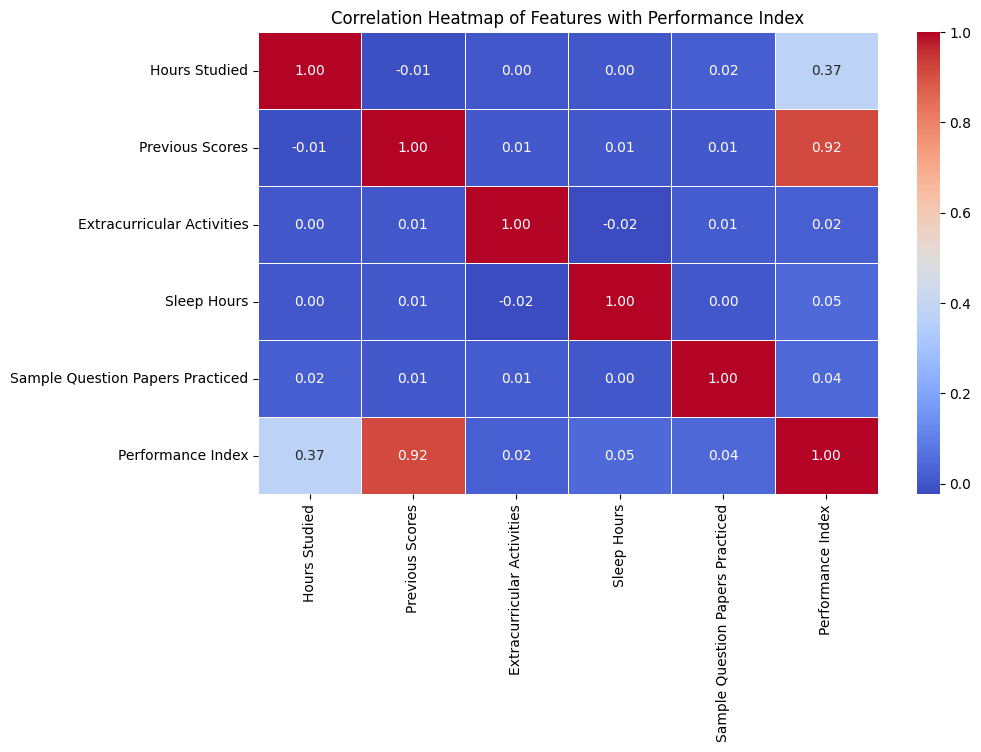

In [151]:
plt.figure(figsize=(10, 6))
sns.heatmap(students.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features with Performance Index")
plt.show()

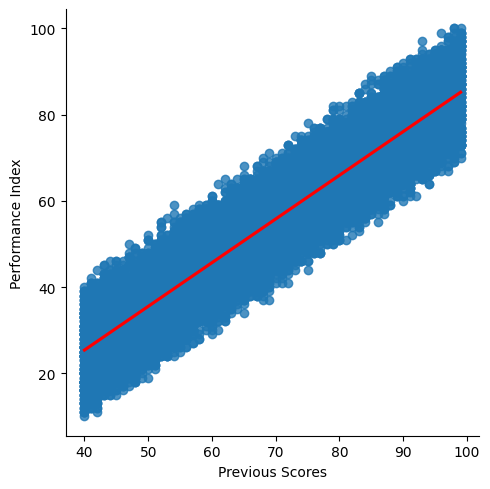

In [152]:
sns.lmplot(x='Previous Scores', y="Performance Index", data=students, line_kws={'color': 'red'}, fit_reg=True, ci=None)

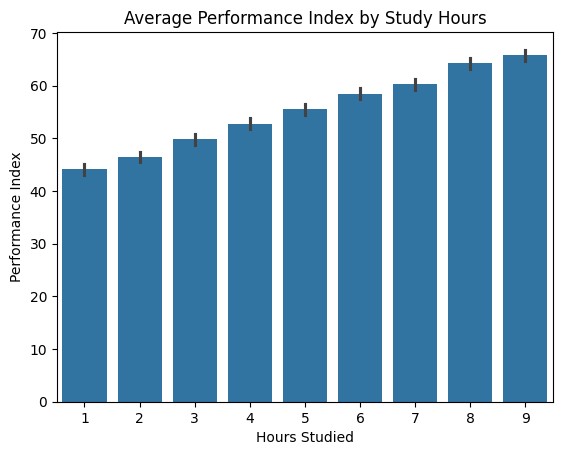

In [153]:
sns.barplot(x="Hours Studied", y="Performance Index", data=students)
plt.title("Average Performance Index by Study Hours")
plt.show()

<Axes: ylabel='Frequency'>

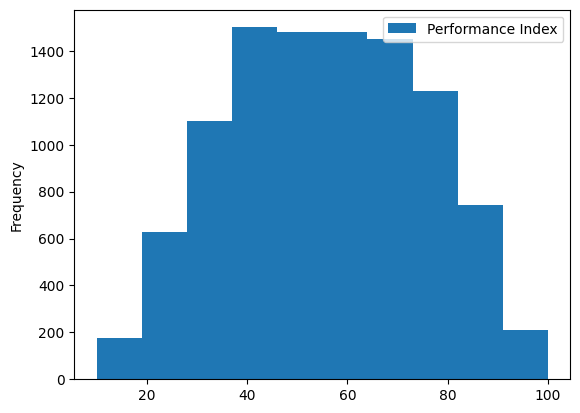

In [154]:
students.plot.hist(y="Performance Index")

In [155]:
# Selecting relevant columns to train
features = ["Previous Scores", "Hours Studied"]
target = "Performance Index"

x = students[features]
y = students[target]

In [156]:
# Splits 20% of data set for testing 80% for training
train, test = train_test_split(students, test_size=0.2, random_state=42)

In [157]:
# Initialize and train the model
reg = LinearRegression()
reg.fit(train[features], train[target])

LinearRegression()

In [158]:
predictions = reg.predict(test[features])

In [159]:
# Checking to see if the predictions look good
print(predictions[:20])

[54.8191498  22.84514046 47.30962885 30.2082726  44.25751421 60.14753885
 47.50358891 85.14633616 37.13591338 70.70917444 63.15208223 25.8972551
 63.19965349 44.45147427 48.13304034 46.4386461  57.62973312 79.67155831
 66.39815693 45.85676593]


In [160]:
results = pd.DataFrame({
    "Actual": test[target].values,
    "Predicted": predictions
})
print(results.head(10))

   Actual  Predicted
0    51.0  54.819150
1    20.0  22.845140
2    46.0  47.309629
3    28.0  30.208273
4    41.0  44.257514
5    59.0  60.147539
6    48.0  47.503589
7    87.0  85.146336
8    37.0  37.135913
9    73.0  70.709174


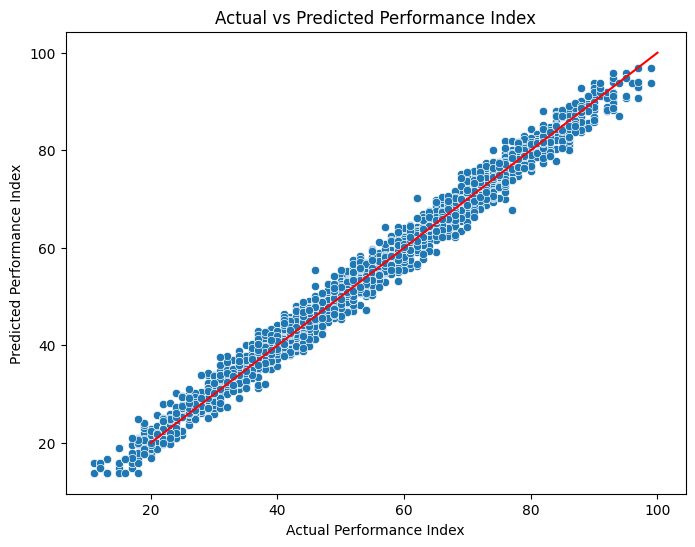

In [161]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=test[target], y=predictions)
plt.plot(np.linspace(20,100,100), np.linspace(20,100,100), color='red', label="Perfect Fit")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
r2 = r2_score(test[target], predictions)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}") 

Mean Absolute Error: 1.83
Mean Squared Error: 5.24
R-Squared Score: 0.99


## Cross Validation and Ridge and Lasso Regression to confirm high predictive performance

In [163]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(reg, x, y, cv=5, scoring='r2')

print(f"Cross-Validation R² Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation R² Score: 0.9858 ± 0.0006


In [164]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(train[features], train[target])

ridge_predictions = ridge_reg.predict(test[features])

# Evaluate Ridge Model
ridge_r2 = ridge_reg.score(test[features], test[target])
print(f"Ridge Regression R² Score: {ridge_r2:.4f}")

Ridge Regression R² Score: 0.9859


In [165]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(train[features], train[target])

lasso_predictions = lasso_reg.predict(test[features])

# Evaluate Lasso Model
lasso_r2 = lasso_reg.score(test[features], test[target])
print(f"Lasso Regression R² Score: {lasso_r2:.4f}")

Lasso Regression R² Score: 0.9857


In [166]:
import joblib
joblib.dump(reg, "linear_regression_model.pkl")

['linear_regression_model.pkl']